<a href="https://colab.research.google.com/github/Archer001201/Computer-Vision-Project-Overview/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/My Drive/IAT360/FaceDetectionDataset'

data_yaml = f"""
train: {base_dir}/train/images
val: {base_dir}/valid/images

nc: 1
names: ['class1']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/drive/My Drive/IAT360/FaceDetectionDataset/data.yaml',
    epochs=3,
    batch=32,
    imgsz=640,
    lr0=0.001,
)

model.val()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/IAT360/FaceDetectionDataset/data.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 19.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/train/labels... 300 images, 90 backgrounds, 0 corrupt: 100%|██████████| 300/300 [01:19<00:00,  3.76it/s]


train: New cache created: /content/drive/My Drive/IAT360/FaceDetectionDataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/valid/labels... 200 images, 31 backgrounds, 0 corrupt: 100%|██████████| 200/200 [01:00<00:00,  3.32it/s]


val: New cache created: /content/drive/My Drive/IAT360/FaceDetectionDataset/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.904      3.269      1.623         74        640: 100%|██████████| 10/10 [06:00<00:00, 36.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:12<00:00, 18.10s/it]

                   all        200        287    0.00415      0.868      0.106     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.855      2.353       1.46         90        640: 100%|██████████| 10/10 [05:25<00:00, 32.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:07<00:00, 16.80s/it]

                   all        200        287    0.00422      0.882      0.451      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.671      1.886      1.395        124        640: 100%|██████████| 10/10 [04:55<00:00, 29.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:07<00:00, 16.86s/it]

                   all        200        287      0.925      0.214      0.463      0.226



3 epochs completed in 0.333 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:59<00:00, 14.80s/it]


                   all        200        287      0.925      0.214      0.463      0.226
Speed: 2.5ms preprocess, 266.0ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/valid/labels.cache... 200 images, 31 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:58<00:00,  8.39s/it]


                   all        200        287      0.925      0.214      0.463      0.226
Speed: 2.5ms preprocess, 261.3ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ef1d44d7a30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 (no detections), 160.0ms
Speed: 6.2ms preprocess, 160.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


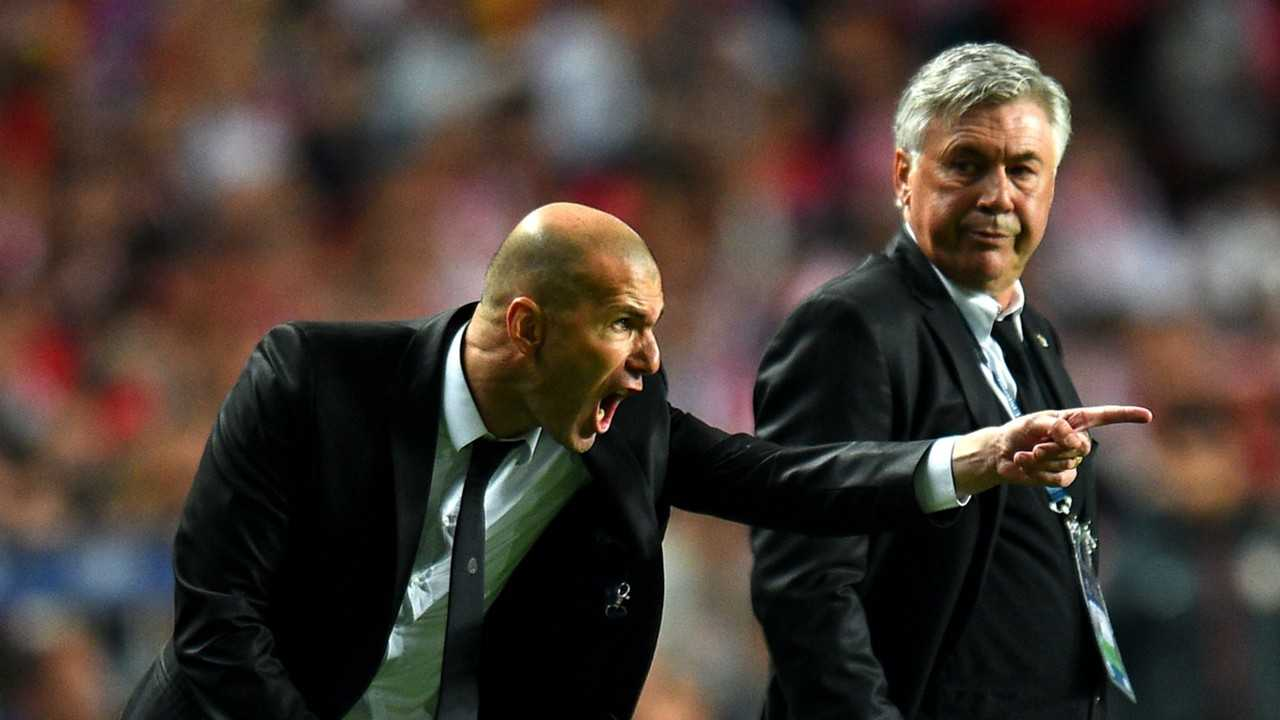

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Image.open('https://ultralytics.com/images/zidane.jpg')

results = model.predict(source='https://ultralytics.com/images/zidane.jpg')

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image


#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)

In [33]:
# 初始化计数器
face_count = 0

# 遍历每个结果并统计检测到的人脸数
for result in results:
    # 检测到的边界框信息存储在 result.boxes.xyxy
    face_count += len(result.boxes.xyxy)  # 统计检测到的人脸数量

print("检测到的人脸数量:", face_count)


检测到的人脸数量: 0


In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/My Drive/IAT360/FaceDetectionDataset'

data_yaml = f"""
train: {base_dir}/train/images
val: {base_dir}/valid/images

nc: 1
names: ['class1']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)


!pip install ultralytics
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/drive/My Drive/IAT360/FaceDetectionDataset/data.yaml',
    epochs=3,
    batch=32,
    imgsz=640,
    lr0=0.001,
)

model.val()

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Image.open('https://ultralytics.com/images/zidane.jpg')

results = model.predict(source='https://ultralytics.com/images/zidane.jpg')

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image


#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)

# 初始化计数器
face_count = 0

# 遍历每个结果并统计检测到的人脸数
for result in results:
    # 检测到的边界框信息存储在 result.boxes.xyxy
    face_count += len(result.boxes.xyxy)  # 统计检测到的人脸数量

print("检测到的人脸数量:", face_count)
